# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

In [5]:
# Number of Rows = 1898
# Number of Columns = 9

#### Observations:
The Data Frame has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The DataFrame has both Numerical and Categorical datatypes.
1. order_id, customer_id, cost_of_the_order, food_preparation_time and delivery_time are numerical datatypes. 
2. restaurant_name,rating, cuisine_type, day_of_the_week and are categorical datatypes.


In [7]:
df['order_id'].nunique()  

1898

In [8]:
df['customer_id'].nunique()  

1200

In [9]:
df['rating'].unique()  

array(['Not given', '5', '3', '4'], dtype=object)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.describe()
# Minimum time it takes to prepare food = 20.000 minutes
# Average time it takes to prepare food = 27.372 minutes
# Maximum time it takes to prepare food = 35.000 minutes

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
From the above statistical summary of data, we can infer 
1. Minimum time taken to prepare food for an order is 20.000 minutes.
2. Average time taken to prepare food for an order is 27.372 minutes.
3. Maximum time taken to prepare food for an order is 35.000 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Number of food orders that are not rated is 736 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

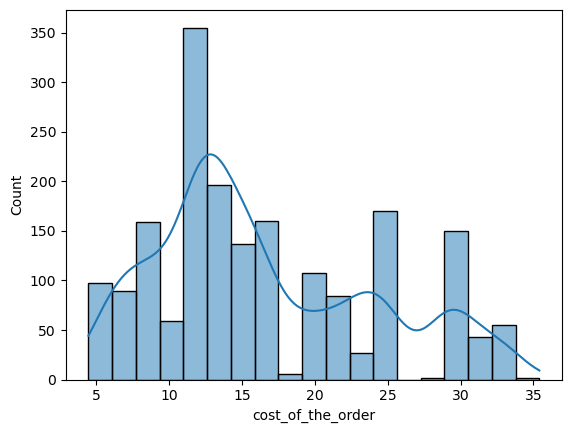

In [13]:
# Histoplot of cost of order
sns.histplot(data = df, x= 'cost_of_the_order', kde = 'TRUE')

## Observation
Histogram for cost_of_the_order is skewed to the right has a large number of occurrences on the left side of the plot with highest peak (Mode) is between 10 & 15 dollars.There are two small peaks as well.

<Axes: xlabel='cost_of_the_order'>

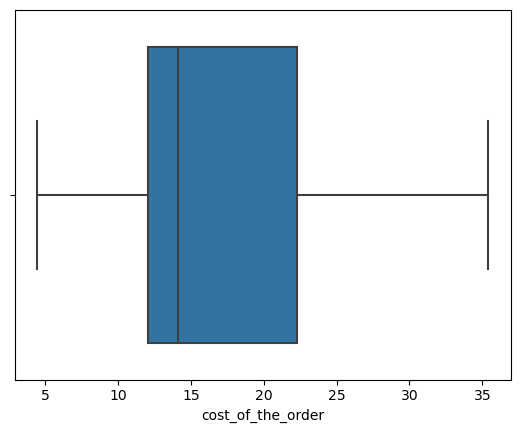

In [14]:
# Boxplot of cost of order 
sns.boxplot(data = df, x= 'cost_of_the_order')

## Observation:
Box plot distribution is positively(right) skewed.
Median value of orders is near to 15 dollars, whereas the maximum value is around 35 dollars

<Axes: xlabel='food_preparation_time', ylabel='Count'>

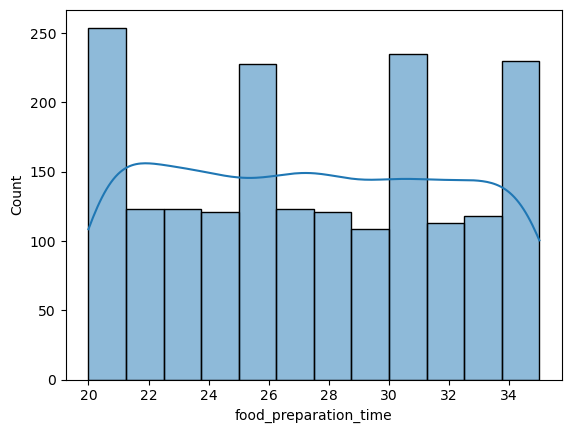

In [15]:
# Histoplot for food preparation time
sns.histplot(data = df, x= 'food_preparation_time', kde = 'TRUE')


## Observation:
Above plot shows histogram of food_preparation_time

<Axes: xlabel='food_preparation_time'>

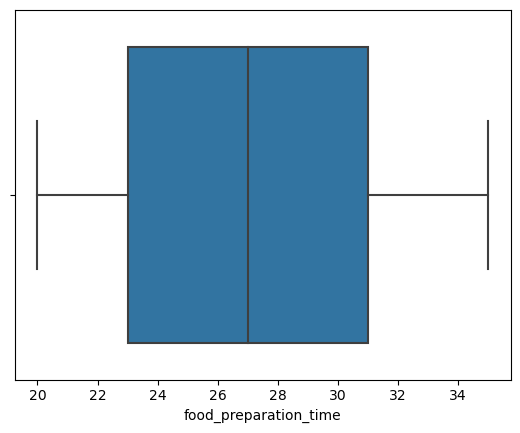

In [16]:
# Box plot for food preparation time
sns.boxplot(data = df, x= 'food_preparation_time')

## Observation:
Box plot of food_preparation_time shows median value is around 27 min,which is approximately equal to mean and hence the distribution is not skewed.

<Axes: xlabel='delivery_time', ylabel='Count'>

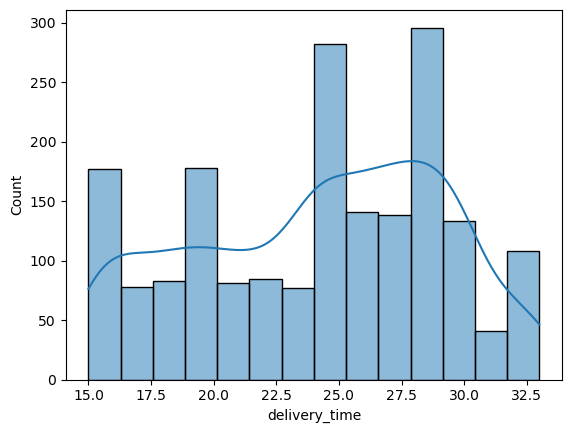

In [17]:
# Histoplot for delivery time
sns.histplot(data = df, x= 'delivery_time', kde = 'TRUE')

## Observation:
Deliverytime Histogram reveals that most of the deliveries occur between 25 to 30 minutes from the time of Pickup.

<Axes: xlabel='delivery_time'>

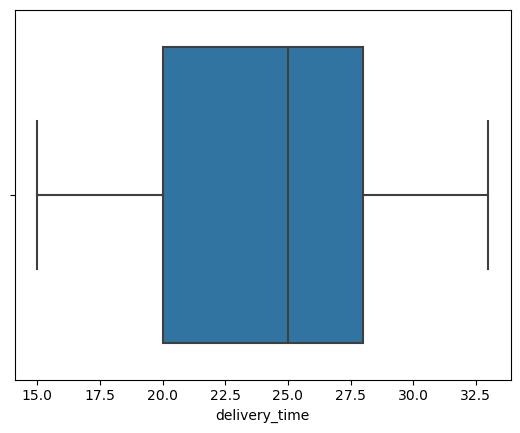

In [18]:
# Box plot of delivery time
sns.boxplot(data = df, x= 'delivery_time')

## Observation:
The Box plot shows that the distribution is slightly left or negatively skewed.Median value is around 25 minutes which is near to the mean value of 24 minutes

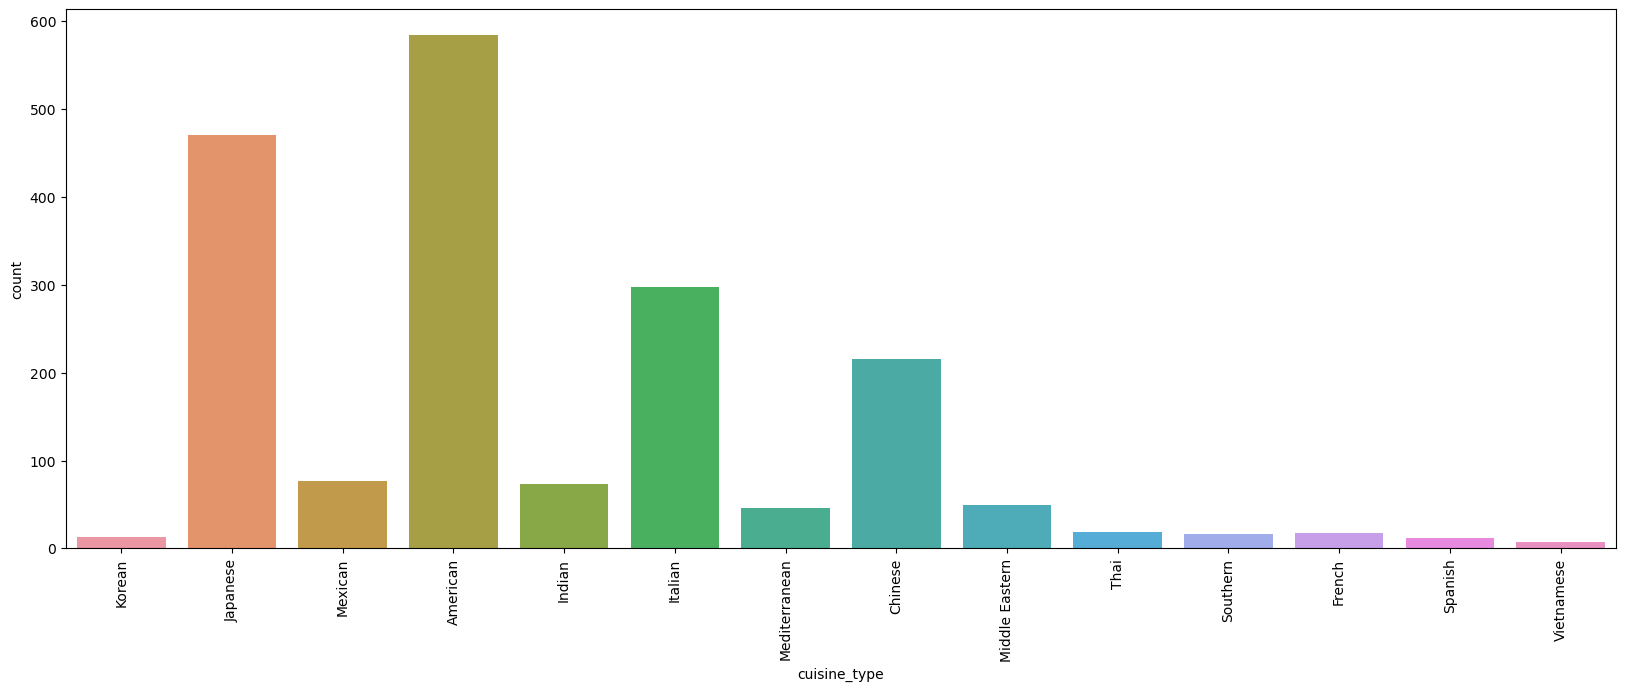

In [19]:
# Countplot for Cuisine type
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

## Observations:
American Cuisine is the most popular cuisine followed by Japanese and Italian. Vietnamese is the least popular cuisine. Mexican, Indian, Mediterranean and Middle Eastern cuisines are fairly popular.

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_20120\1194408211.py:5: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
C:\Users\Nandhini\AppData\Local\Temp\ipykernel_20120\1194408211.py:5: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
C:\Users\Nandhini\anaconda3\Anaconda_New\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nandhini\anaconda3\Anaconda_New\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


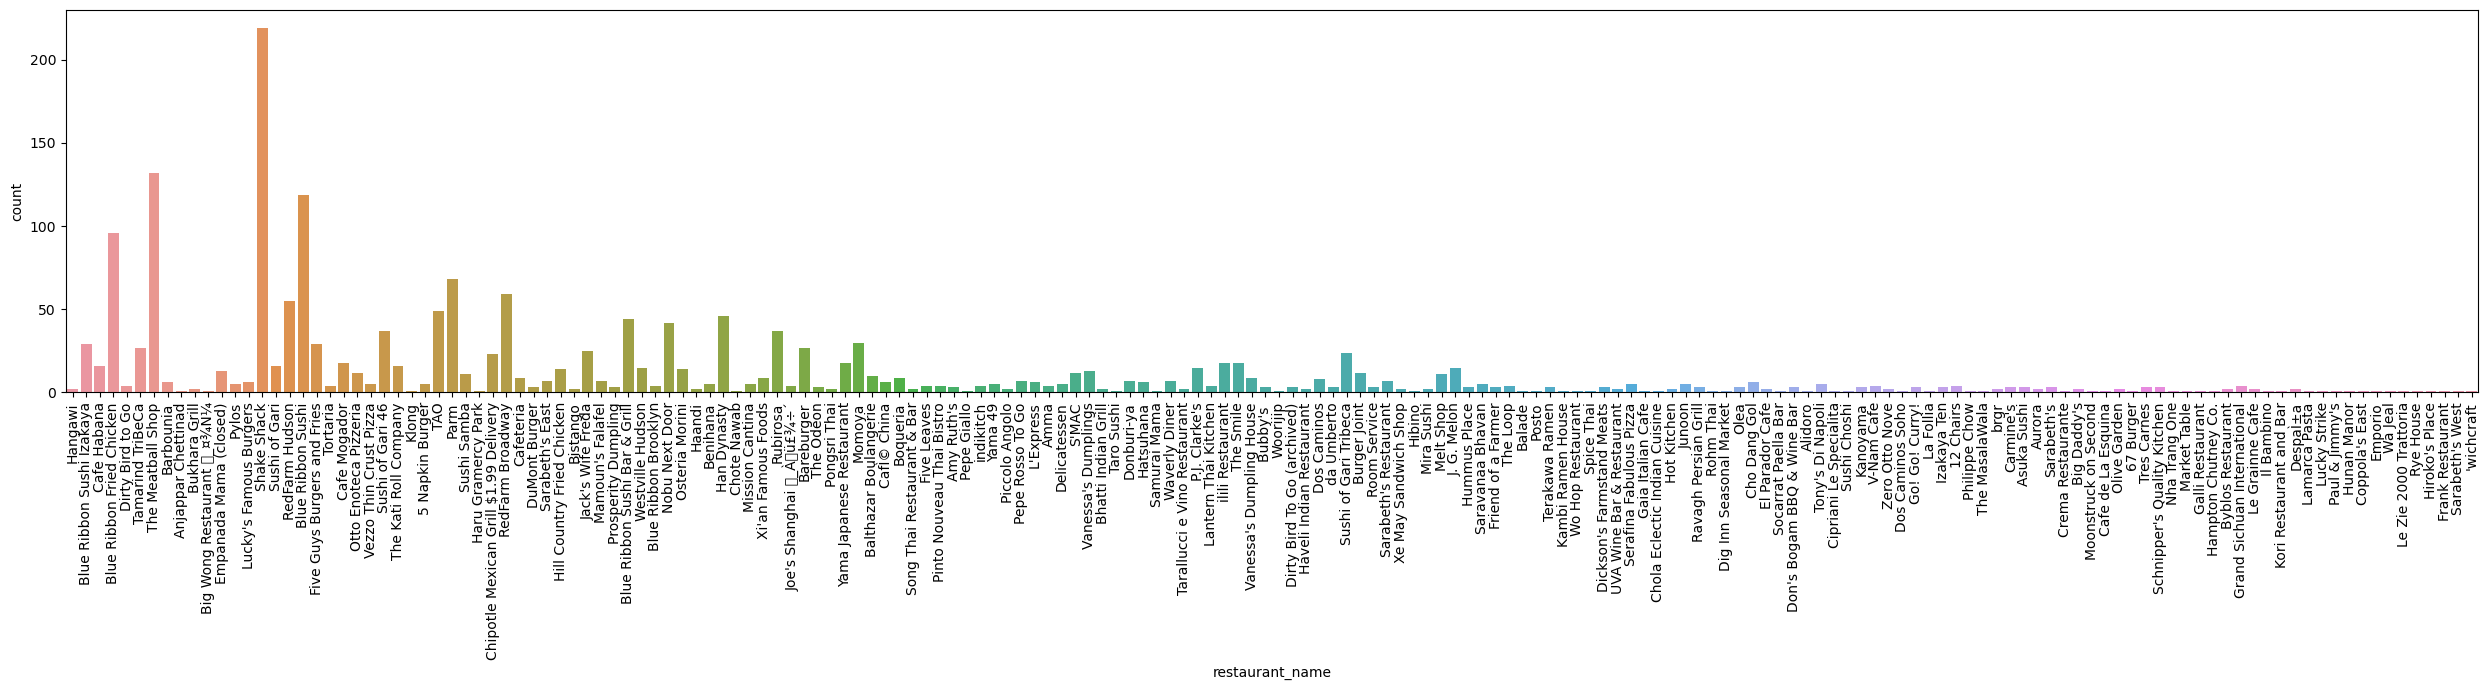

In [20]:
# Countplot of Restaurants
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Observations:
1. Shake shack has the maximum number of food orders. 
2. The Meat ball shop is the second int the list.
3. Blue Ribbon Sushi and Blue Ribbon fried chicken in third and fourth place.


<Axes: xlabel='day_of_the_week', ylabel='count'>

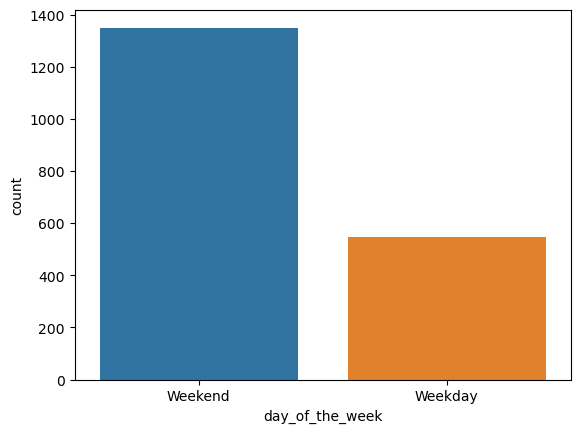

In [21]:
# countplot of day of the week
sns.countplot(data = df, x= 'day_of_the_week')

## Observations:

Overall the number of food Orders is more during Weekends.

<Axes: xlabel='rating', ylabel='count'>

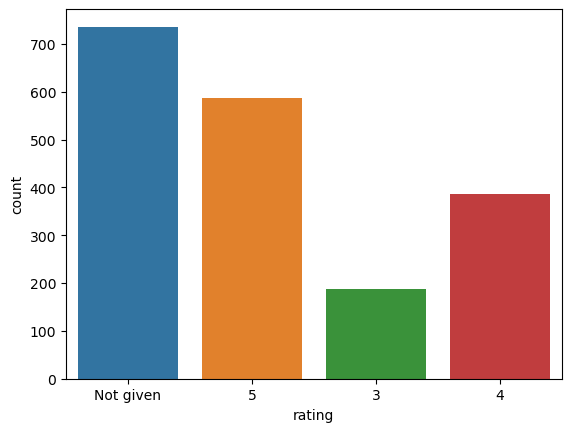

In [22]:
# Countplot of rating
sns.countplot(data = df, x= 'rating')

## Observation:
The above graph represents barchart of ratings. We see that more number of orders have ratings 4 & 5 (without considering ratings that are not given) 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Write the code here
top_restaurants = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Depending upon the more number of orders received, the top 5 restaurants are 
1. Shake Shack (219 orders)
2. The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 orders)
5. Parm (68 orders)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<Axes: xlabel='day_of_the_week', ylabel='count'>

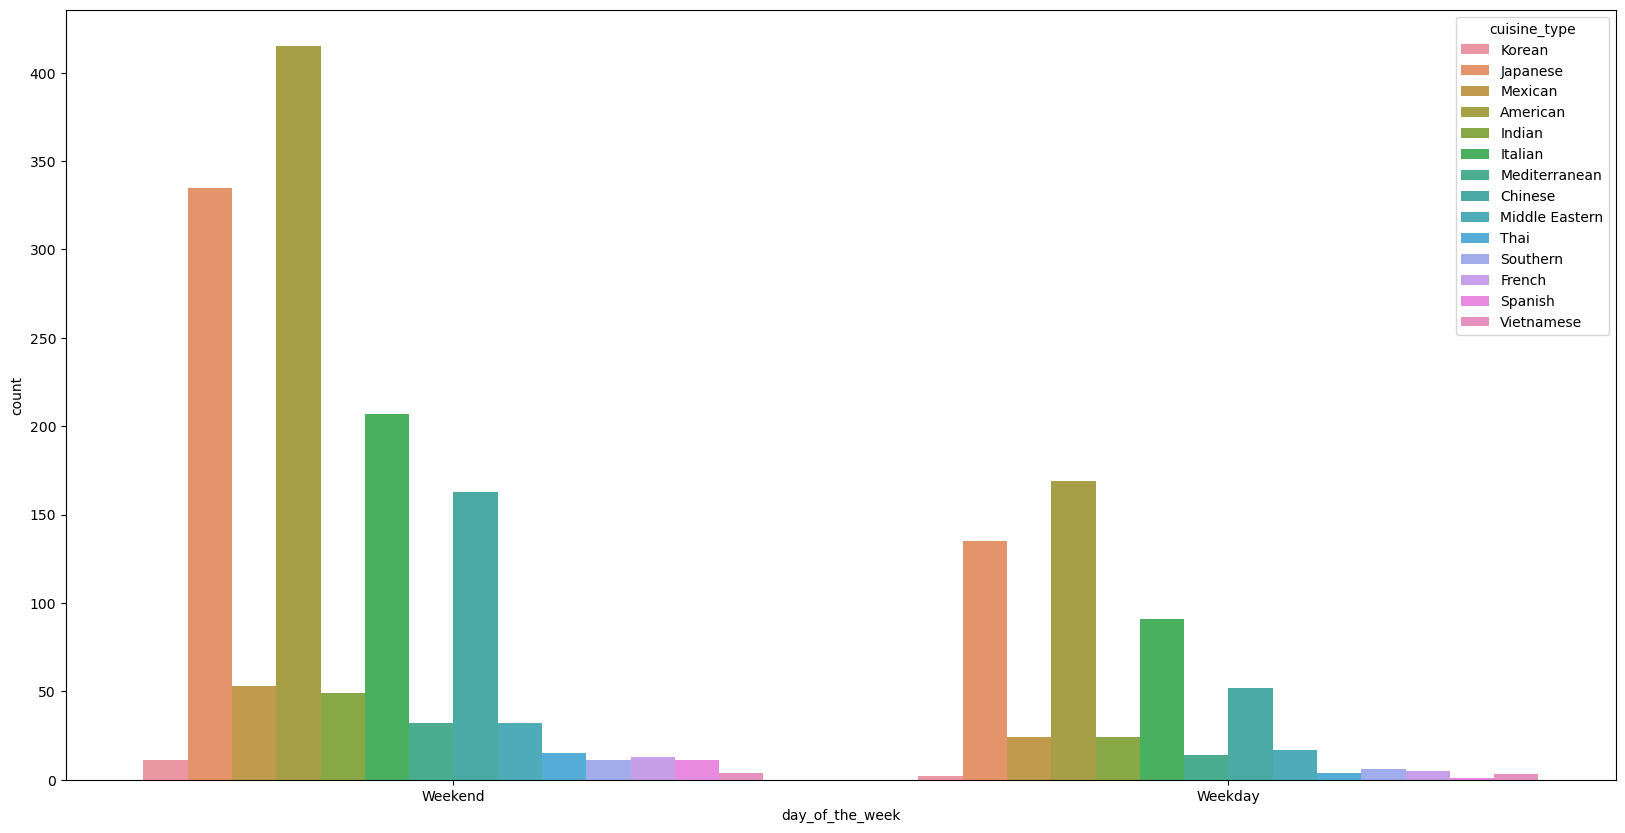

In [24]:
# Write the code here
plt.figure(figsize=(20,10))
sns.countplot(data = df, x= 'day_of_the_week', hue = 'cuisine_type')

In [25]:
top_cuisine_per_day = df.groupby('day_of_the_week')['cuisine_type'].value_counts().groupby('day_of_the_week').head(1)
print(top_cuisine_per_day)

day_of_the_week  cuisine_type
Weekday          American        169
Weekend          American        415
Name: cuisine_type, dtype: int64


#### Observations:
Based on the above countplot and code we can infer that American cuisine was mostly popular on Weekends(based on more number of food orders)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

<Axes: xlabel='cost_of_the_order'>

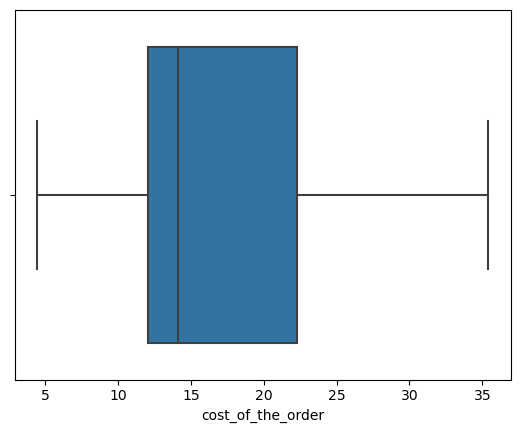

In [26]:
# Write the code here
sns.boxplot(data = df, x= 'cost_of_the_order')


In [27]:
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
percentage_above_20

29.24130663856691

#### Observations:
From the above code, 29.24% of cost_of_the_order are above $20.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean order delivery time is __24.1617__ minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Write the code here
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
The top 3 most frequent customer_ids are 
1. __52832__  with __13__ orders
2. __47440__ with __10__ orders and 
3. __83287__ with __9__ orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


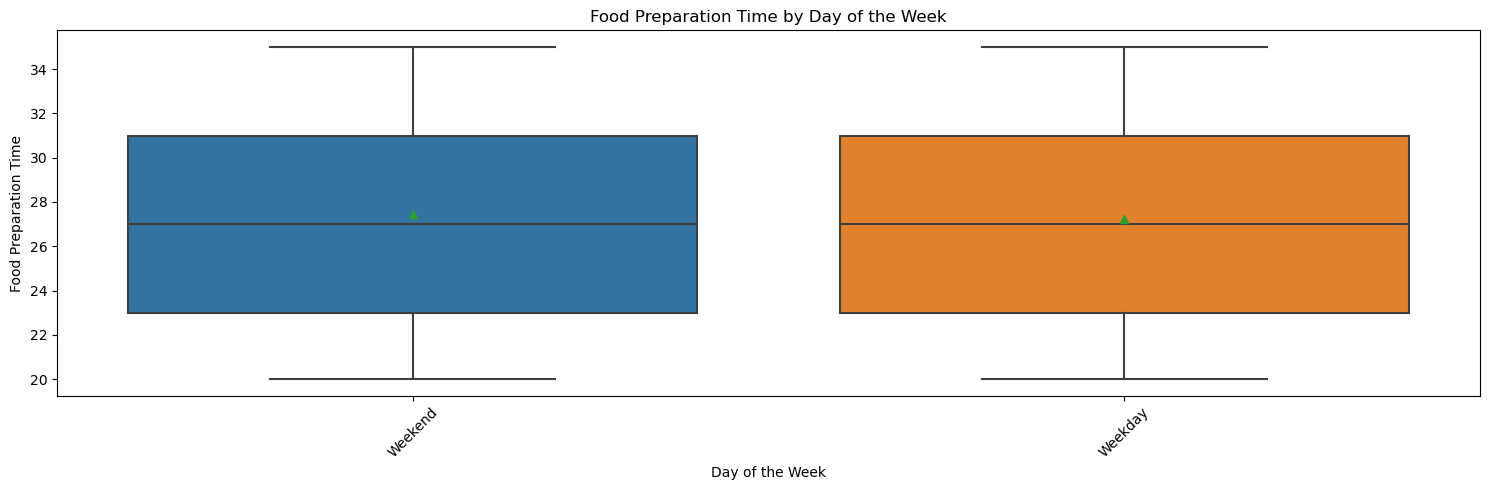

In [30]:
# food preparation time by day of the week
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', showmeans = True)
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.title('Food Preparation Time by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:
Food Preparation time distribution is same during weekdays as well as weekends as seen in box plot

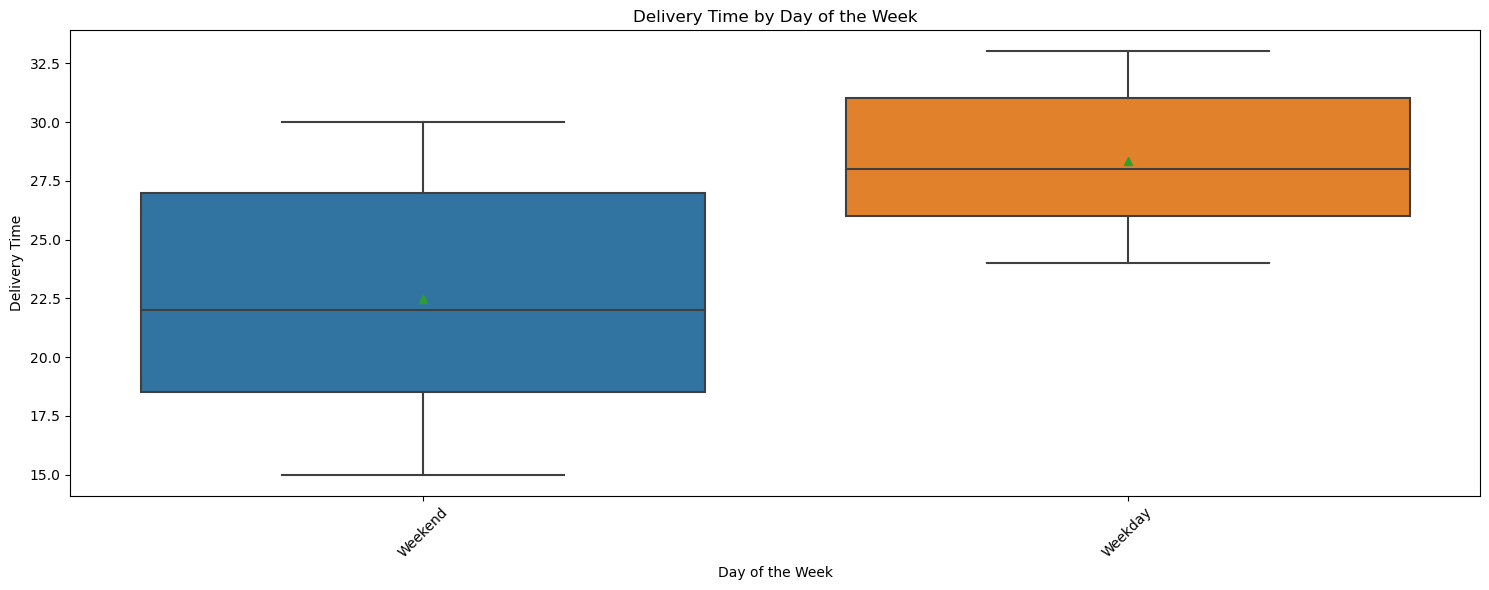

In [31]:
# Delivery time by day of the week
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', showmeans = True)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Delivery Time by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:
Delivery time is more on Weekdays when compared to weekends.

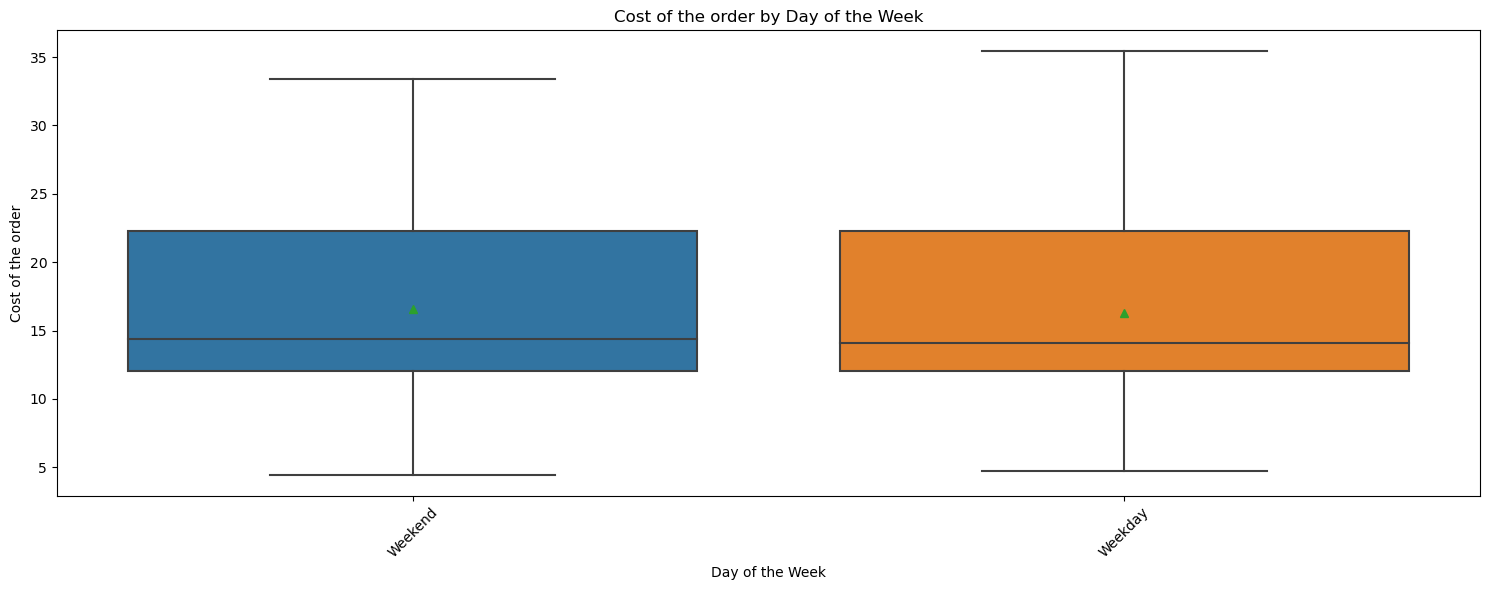

In [32]:
# Cost of the order by day of the week
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', showmeans = True)
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the order')
plt.title('Cost of the order by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:
Cost of the order lies in the same price range both on weekdays and weekends.

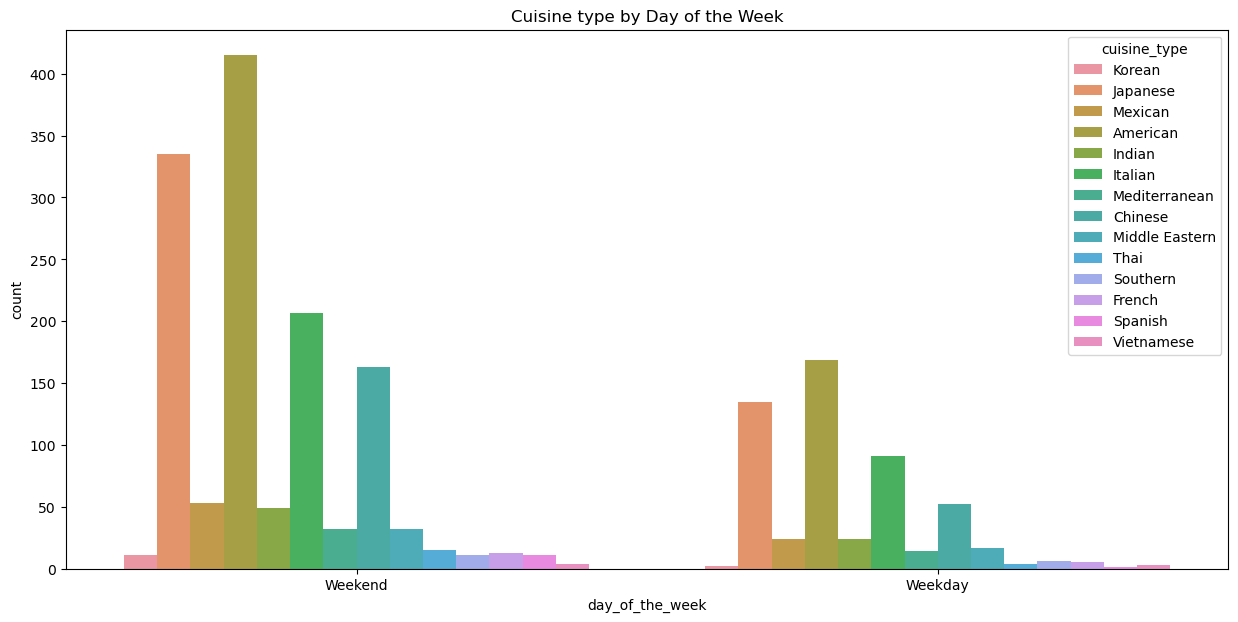

In [33]:
# cuisine type vs day of the week
plt.figure(figsize=(15,7))
sns.countplot(data = df, x= 'day_of_the_week', hue = 'cuisine_type')
plt.title('Cuisine type by Day of the Week')
plt.show()

## Observation:
American Cuisine is the most popular cuisine both on weekdays and weekends. 
Vietnamese cuisine is the least popular cuisine.

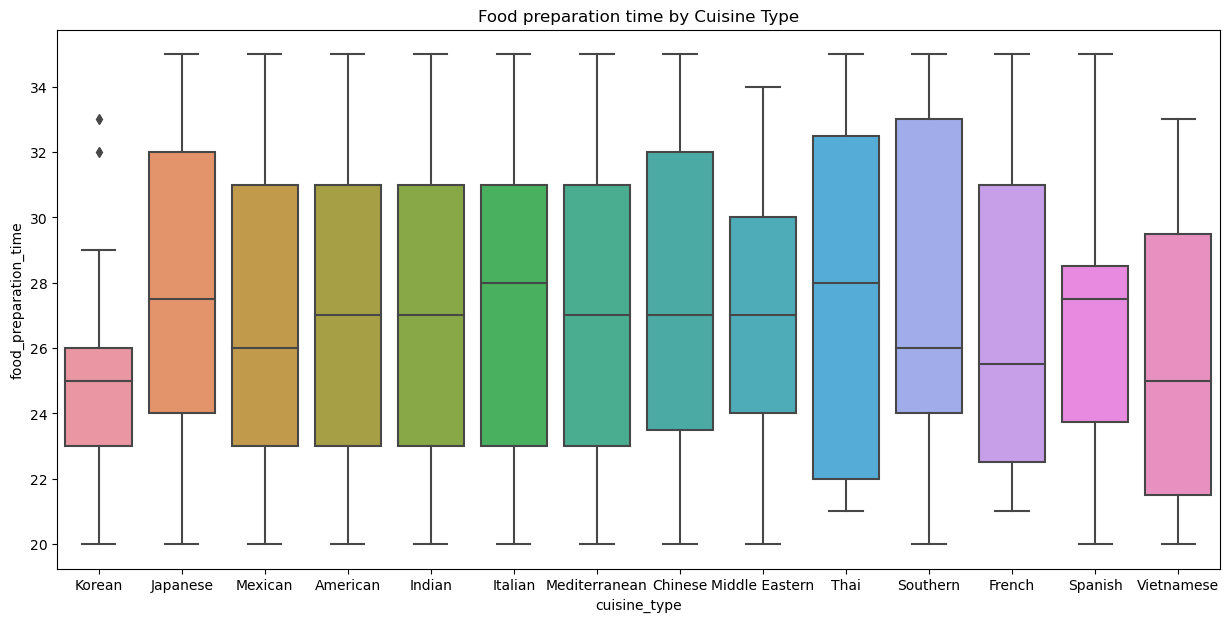

In [34]:
# Cuisine type vs food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x= 'cuisine_type', y= 'food_preparation_time')
plt.title('Food preparation time by Cuisine Type')
plt.show()

## Observation:

Most of the Southern type of Cuisine takes more time to cook.
Korean food takes less time to cook. 

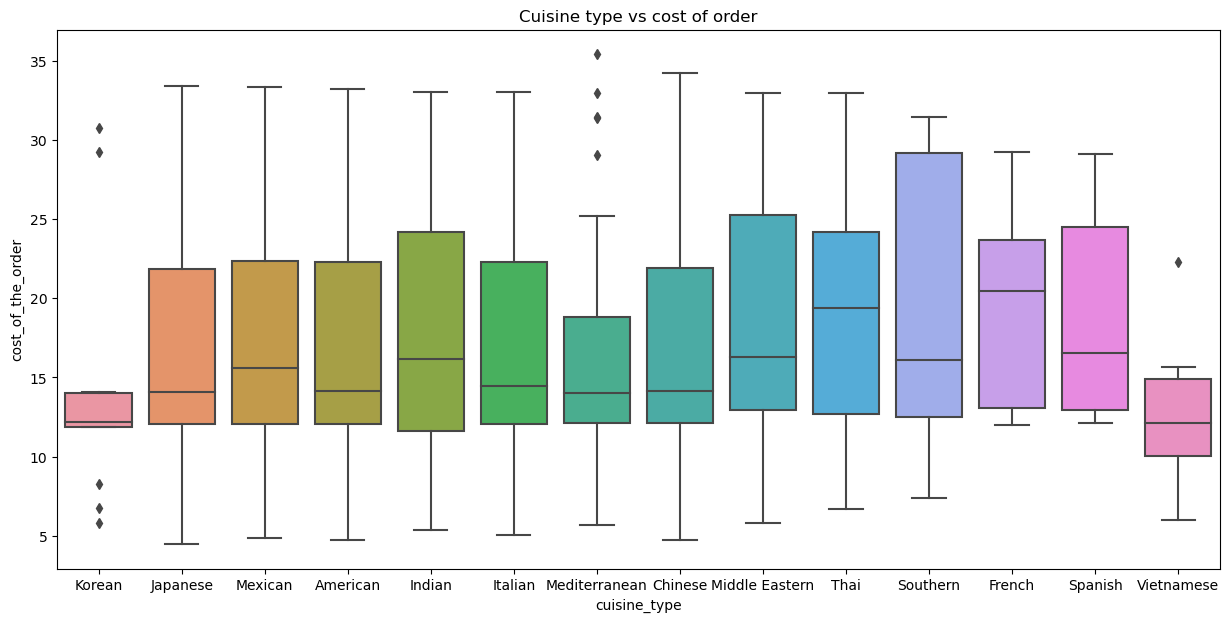

In [35]:
# Cuisine type vs Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x= 'cuisine_type', y= 'cost_of_the_order')
plt.title('Cuisine type vs cost of order')
plt.show()

## Observation:

Vietnamese & Korean food orders cost comes out to be less compared to other cuisines.

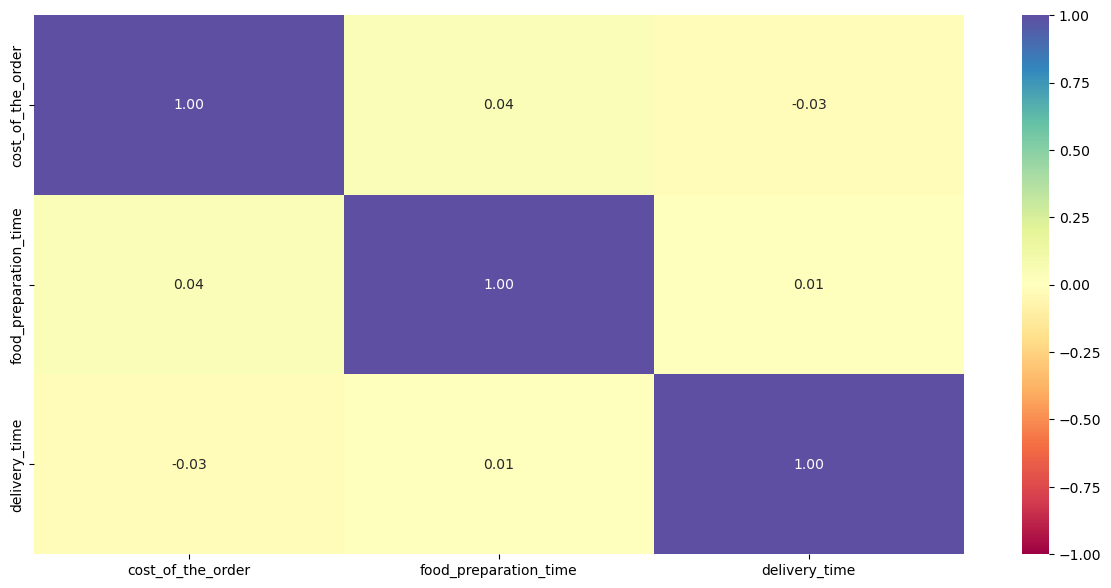

In [36]:
# Heat map of numerical variables
num_column = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_column].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


## Observartion
* Cost_of_the_order and delivery_time are in negative correlation but its also a very meager value with which we cannot make any decisions
* Food_preparation_time and Cost_of_the_order are in positive correlation but its also very meager value.

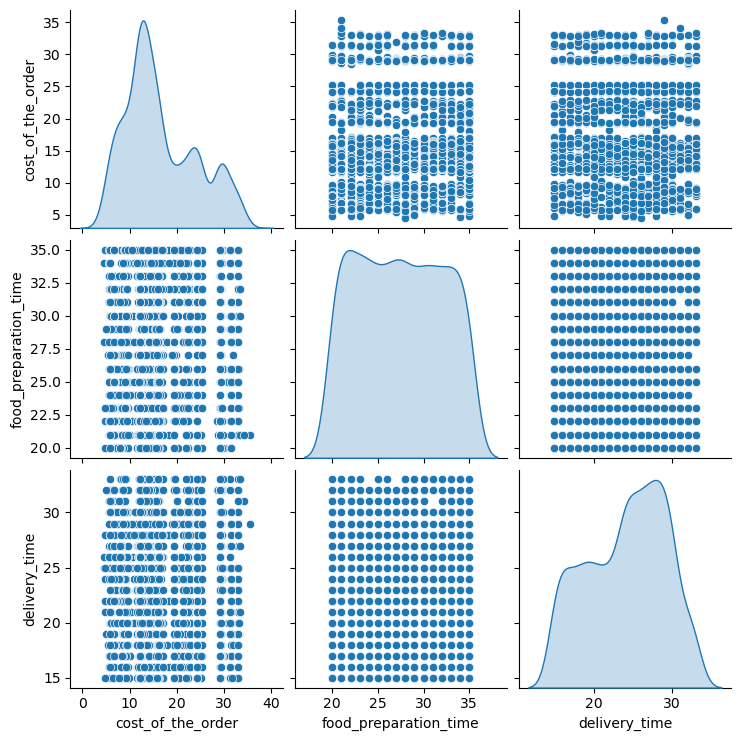

In [37]:
# Pair plot between numerical variables
sns.pairplot(data=df[num_column], diag_kind="kde")
plt.show()

## Observation:

We get the same insights as from the correlation plot.There does not seem to be a strong relationship between cost_of_order and delivery_time

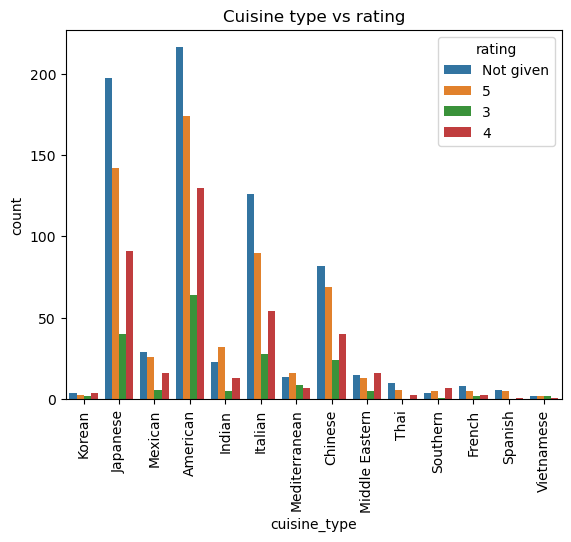

In [38]:
# cuicine type vs rating
sns.countplot(data = df , x = 'cuisine_type', hue = 'rating')
plt.xticks(rotation = 90)
plt.title('Cuisine type vs rating')
plt.show()

## Observations
Lookslike in each and every cuisine, we see that more good ratings 4 & 5 (Ignoring 'Notgiven' ratings)
American has the maximum number of 5 & 4ratings. 

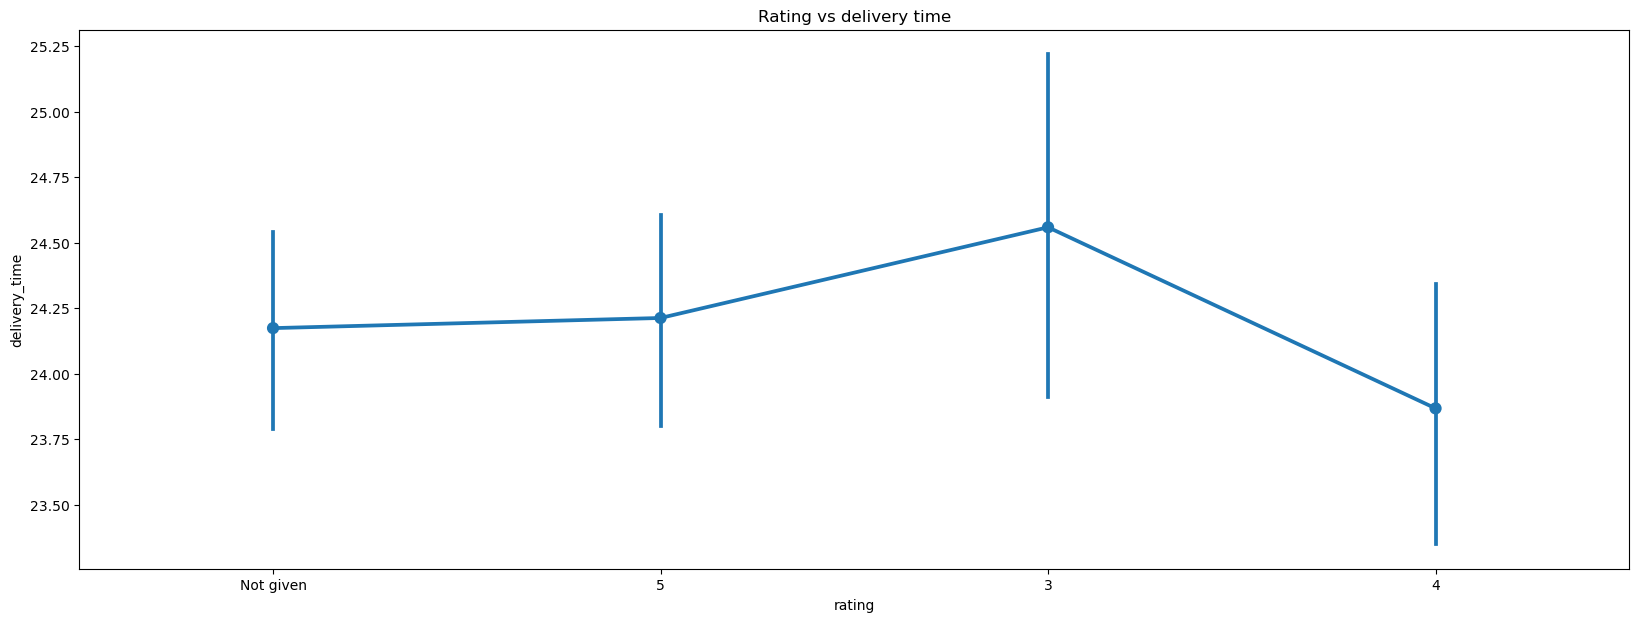

In [39]:
# Rating vs delivery time
plt.figure(figsize=(20, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Rating vs delivery time')
plt.show()

## Observation:

Delivery time affects good rating from customers. 
Company should work on optimizing the time taken for delivery by discovering new routes.

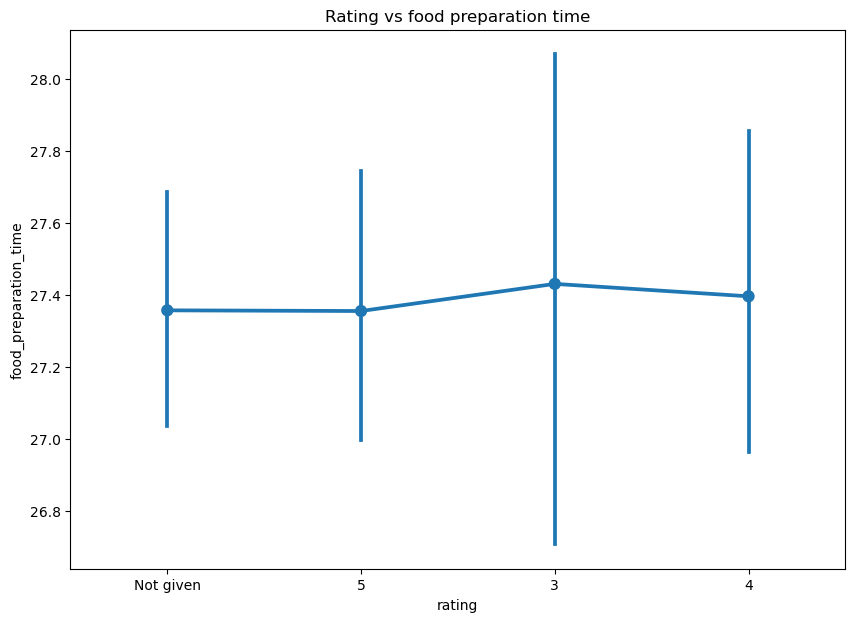

In [40]:
# Rating vs food preparation time
plt.figure(figsize=(10, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.title('Rating vs food preparation time')
plt.show()

## Observation:
Food preparation time affects rating more likely as we can see in the graph for rating 3.

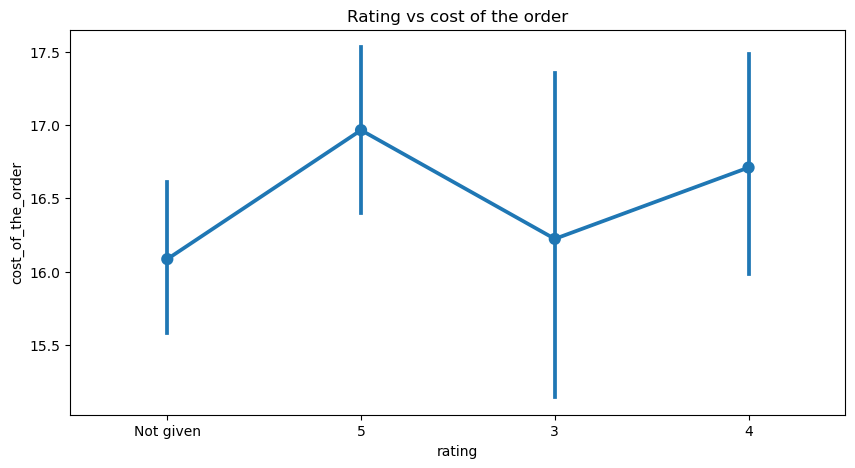

In [41]:
# Rating vs cost of the order
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.title('Rating vs cost of the order')
plt.show()

## Observation:
Cost of the order doesnt affect rating. Customers given good ratings even though the cost of the order is more.

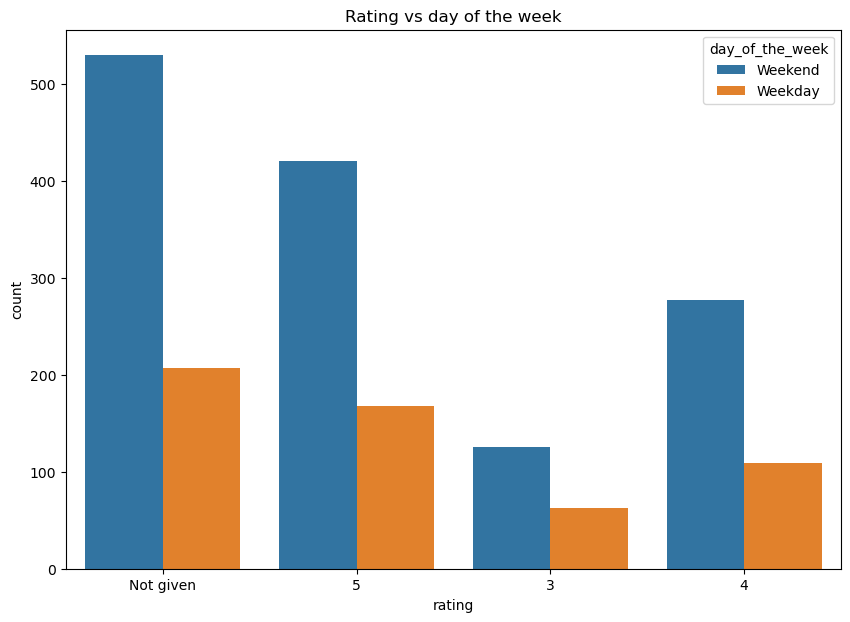

In [42]:
# Rating vs day of the week
plt.figure(figsize=(10,7))
sns.countplot(data = df, x= 'rating', hue = 'day_of_the_week')
plt.title('Rating vs day of the week')
plt.show()

## Observation:

Above barchart shows the feed back ratings given by customers during weekday and weekend. We could observe that more number of customers would like to leave a feedback on weekends.

In [43]:
result1 = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index()
result1_sorted = result1.sort_values(by='cost_of_the_order', ascending=False)

print(result1_sorted)

      cuisine_type  cost_of_the_order
2           French          19.793889
10        Southern          19.300588
12            Thai          19.207895
11         Spanish          18.994167
9   Middle Eastern          18.820612
8          Mexican          16.933117
3           Indian          16.919726
4          Italian          16.418691
0         American          16.319829
1          Chinese          16.305209
5         Japanese          16.304532
7    Mediterranean          15.474783
6           Korean          14.001538
13      Vietnamese          12.882857


## Observation:
The above results gives us the mean cost of order of all different cuisines

In [44]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

## Observation:
The above code gives us the total revenue generated by the top restaurants being a part of Food hub.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [45]:
# Write the code here
df_new = df[df['rating'] != 'Not given'].copy()
df_new.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [46]:
df_new['rating'] = df_new['rating'].astype('int') #changing rating datatype as integer
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int32  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 86.2+ KB


In [47]:
df_rating_count = df_new.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

df_rating_count.rename(columns={'rating':'rating_counts'},inplace=True)
df_rating_count

,restaurant_name,rating_counts
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [48]:
avg_rating_per_restaurant = df_new.groupby('restaurant_name')['rating'].mean().reset_index()
avg_rating_per_restaurant 

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [49]:
merged_df = pd.merge(df_rating_count,avg_rating_per_restaurant, on='restaurant_name')
print(merged_df)

               restaurant_name  rating_counts    rating
0                  Shake Shack            133  4.278195
1            The Meatball Shop             84  4.511905
2            Blue Ribbon Sushi             73  4.219178
3    Blue Ribbon Fried Chicken             64  4.328125
4             RedFarm Broadway             41  4.243902
..                         ...            ...       ...
151           Frank Restaurant              1  4.000000
152        Socarrat Paella Bar              1  5.000000
153            El Parador Cafe              1  5.000000
154               Lucky Strike              1  4.000000
155                 'wichcraft              1  5.000000

[156 rows x 3 columns]


In [50]:
filtered_df = merged_df[(merged_df['rating_counts'] > 50) & (merged_df['rating'] > 4)] #it will subset the data as per the specified condition
filtered_df

,restaurant_name,rating_counts,rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
From the above output, we can observe that the top restaurants with rating counts more than 50 and average rating more 4 are 
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
The above restaurants are eligible for the promotional offer from the FoodHub company.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# Write the code here # def function to get answer
def revenue(x):
    
    if x > 20:      
        rev_cost = 0.25 * x 
    elif x > 5:
        rev_cost = 0.15 * x
    else:
        rev_cost = 0   
    return rev_cost
df['comp_revenue'] = df['cost_of_the_order'].apply(revenue)    
df.head()               



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,comp_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [52]:
total_rev = df['comp_revenue'].sum()
print("The net revenue is around", total_rev, 'dollars')

The net revenue is around 6166.303 dollars


#### Observations:

The net revenue generated by the FoodHub company is __$6166.303__

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [53]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [54]:
df.head() #total_time column added to dataframe

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,comp_revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [55]:
timetaken_above_60 = df[df['total_time'] > 60]
percentage_above_60 = (len(timetaken_above_60) / len(df)) * 100
percentage_above_60 # 10.537 % orders are taking more than 60 min total time

10.537407797681771

#### Observations:
1. Total_time column shows time taken to deliver food from the time the order is placed.
2. 10.537 % orders are taking more than 60 min total time

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

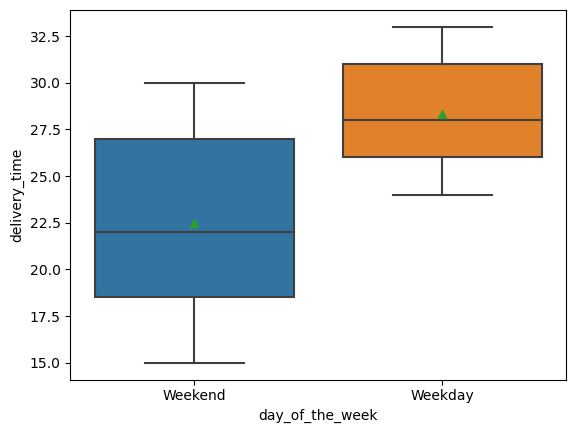

In [56]:
# Write the code here
sns.boxplot(data =df, y= 'delivery_time', x = 'day_of_the_week', showmeans = True)
df.groupby(['day_of_the_week'])['delivery_time'].mean()

#### Observations:
The delivery_time categorized asper the days_of_the_week for which the mean is found to be for Weekday 28.34 minutes and Weekend 22.47 minutes.
As per the data given mean delivery_time is less on weekends compared to weekdays


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

From the given dataset we were able to conclude that

*  __Shake shack__ is the most famous restaurant.
*  __American Cuisine__ is the top preferred cuisine followed by Japanese.
*  Overall from the given data, The FoodHub company generated __6166.303__ dollars from the food orders.
*  The top restaurants based on more number of food orders,rating counts and average rating more than 4 are
    1. Shake Shack
    2. The Meatball Shop
    3. Blue Ribbon Sushi
    4. Blue Ribbon Fried Chicken.
    We can improve business by giving some promotional offers to these restaurants to attracts customers.
*   More number of orders are received in the weekend.
*  There is no strong relationship between cost_of_the_order and food_preparation_time and delivery_time.
*  Rating gets affected if the food_preparation_time and delivery_time are more than usual.
*  Cost of order doesnt affect rating given by customers.
*  food_preparation_time is same during weekdays and weekends,however delivery time is less during weekends.
*  Most of the orders are in the range between 10 and 15 dollars. Giving discount on prices above a range (for example above 30 dollars get 15% off) then restaurants will get more value of orders and the same time the Food_hub company can generate more revenue.
* Need to investigate further why the number of orders is less during weekdays.







### Recommendations:

1. The Food_hub company can run promotional offers in the app to attract more new customers .
2. Company can also promote restaurants by giving discount on orders. The company should also work on adding more restaurants to the list based on the popular cuisine which helps in getting more number of orders.
3. Can Utilize social media and online advertising to increase brand visibility and engage with customers.
4. Demand is high on weekends, company should be ready to take as many orders as it can to avoid any delivery time delays which may affect customer satisfaction and rating.
5. From the data, the company gets comparatively less number of orders on weekdays.That can be improved by collaborating with local restaurants and suppliers to offer exclusive deals and partnerships that benefit both parties.
6. To keep an eye on the market and competition to adapt quickly to changing trends and customer food preferences.
7. The company should continue to request a feedback from customer after every order that helps in adding new features and services in the app.
8. Optimize delivery routes using technology to minimize delivery times and reduce costs.








---